In [33]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline

In [36]:
df=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Car%20Sale%20Advertisements/car_ad.csv", encoding='latin-1')

In [37]:
df = df.drop(df[df.price <= 0 ].index)
df.price[df.price ==0].count()

0

In [38]:
df.head(3)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear


In [39]:
df = df.drop(df[df.price == 0].index)
df.price[df.price == 0].count()

0

In [40]:
df.shape

(9309, 10)

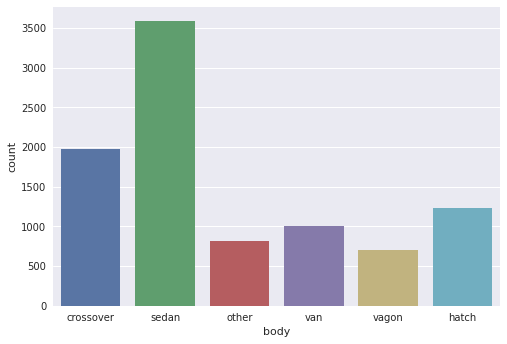

In [42]:
sns.countplot(df["body"])

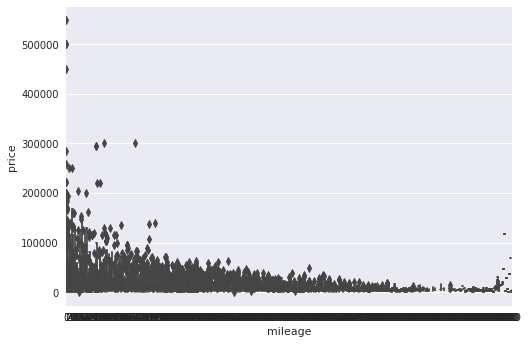

In [43]:
sns.boxplot(x='mileage',y='price',data=df)

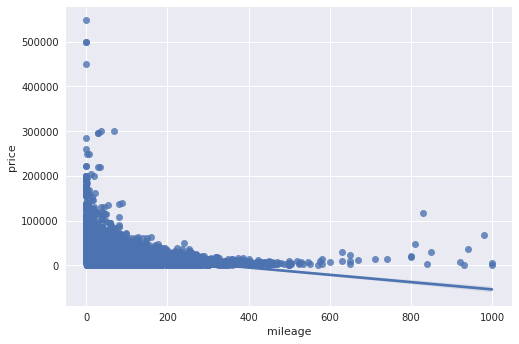

In [44]:
sns.regplot(x='mileage',y='price',data=df)

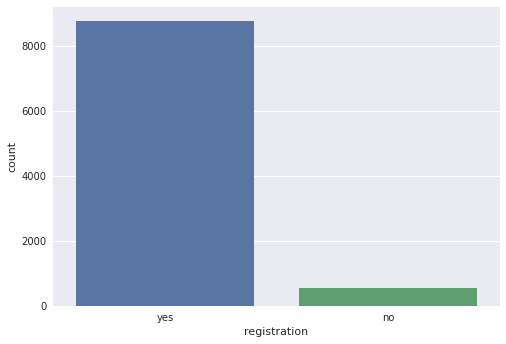

In [45]:
sns.countplot(df['registration'])

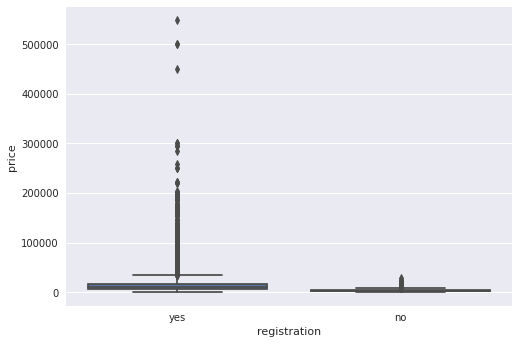

In [46]:
sns.boxplot(x='registration',y='price',data=df)

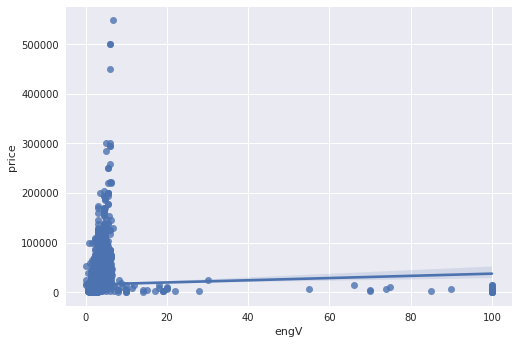

In [47]:
sns.regplot(x='engV',y='price',data=df)

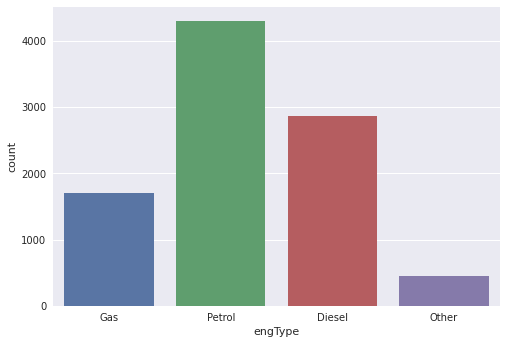

In [48]:
sns.countplot(df['engType'])

In [49]:
from sklearn import model_selection, preprocessing
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))

In [50]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,25,15500.0,0,68,2.5,1,1,2010,490,1
1,52,20500.0,3,173,1.8,1,1,2011,332,3
2,52,35000.0,2,135,5.5,3,1,2008,240,3
3,52,17800.0,5,162,1.8,0,1,2012,206,0
4,52,33000.0,4,91,NaN,2,1,2013,332,2


In [53]:
y_train = df["price"]
x_train = df.drop(["price"], axis=1)
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
x_train.head(3)

,car,body,mileage,engV,engType,registration,year,model,drive
0,25,0,68,2.5,1,1,2010,490,1
1,52,3,173,1.8,1,1,2011,332,3
2,52,2,135,5.5,3,1,2008,240,3


In [55]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [56]:
df.price.skew()

7.1129147348625485

In [57]:
label_test_log=np.log(label_test)
label_train_log=np.log(label_train)
dtrain_log = xgb.DMatrix(data_train, label_train_log)
label_train1=np.log(label_train)

In [59]:
label_train_log.skew()

0.17376919751900072

In [60]:
dtrain = xgb.DMatrix(data_train, label_train)
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[01:49:48] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:48] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:49:48] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:48] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:49:48] WARNING: ../src/objective/regression_

In [61]:
dtrain = xgb.DMatrix(data_train, label_train)
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[01:50:41] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:41] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:50:41] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:41] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:50:41] WARNING: ../src/objective/regression_

[01:51:24] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:51:24] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:51:26] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:51:26] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




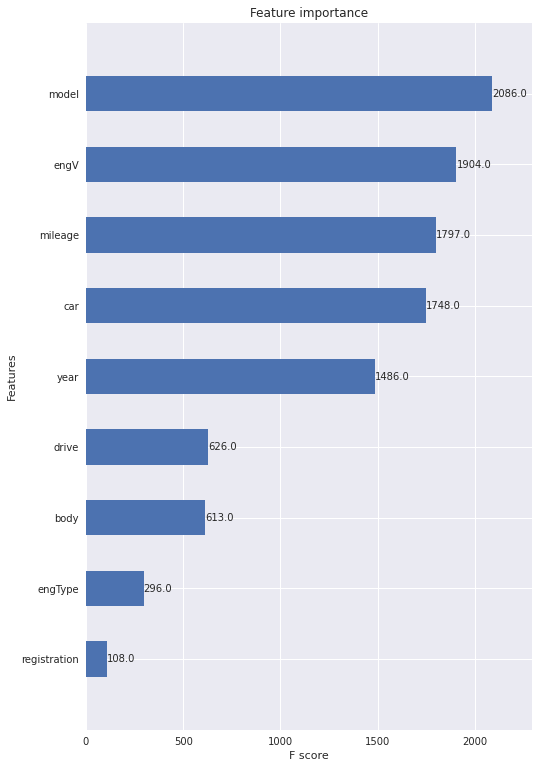

In [62]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 

num_boost_rounds)
num_boost_rounds = len(cv_output)
model_log = xgb.train(dict(xgb_params, silent=0), dtrain_log, num_boost_round= 

num_boost_rounds)
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [63]:
dtest=xgb.DMatrix(data_test)
data_test.head(2)

,car,body,mileage,engV,engType,registration,year,model,drive
6154,52,2,210,4.30,1,1,2000,544,1
144,52,0,0,2.98,0,1,2016,405,1


In [66]:
y_predict = model.predict(dtest)
out = pd.DataFrame({'Actual_price': label_test, 'predict_price': y_predict,'Diff' :(label_test-y_predict)})
out[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
6154,8500.0,10900.442383,-2400.442383
144,109999.0,109461.625000,537.375000
3627,14700.0,13294.122070,1405.877930
4541,12400.0,11158.984375,1241.015625
3200,10200.0,13556.566406,-3356.566406


In [68]:
y_predict_log = model_log.predict(dtest)
y_predict_log=np.exp(y_predict_log)
out_log = pd.DataFrame({'Actual_price': label_test, 'predict_price': y_predict_log,'Diff' :(label_test-y_predict_log)})
out_log[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
6154,8500.0,10020.202148,-1520.202148
144,109999.0,113645.640625,-3646.640625
3627,14700.0,14310.958008,389.041992
4541,12400.0,11392.197266,1007.802734
3200,10200.0,11306.722656,-1106.722656


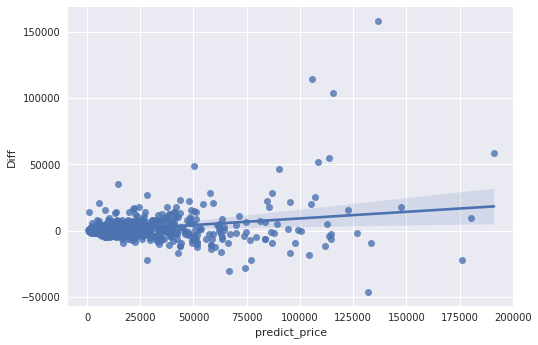

In [69]:
sns.regplot(out_log['predict_price'],out_log['Diff'])

In [70]:
out[['Actual_price','predict_price','Diff']].head(3)

,Actual_price,predict_price,Diff
6154,8500.0,10900.442383,-2400.442383
144,109999.0,109461.625000,537.375000
3627,14700.0,13294.122070,1405.877930


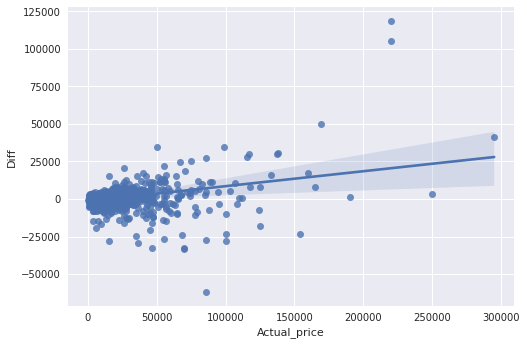

In [71]:
sns.regplot(out['Actual_price'],out['Diff'])

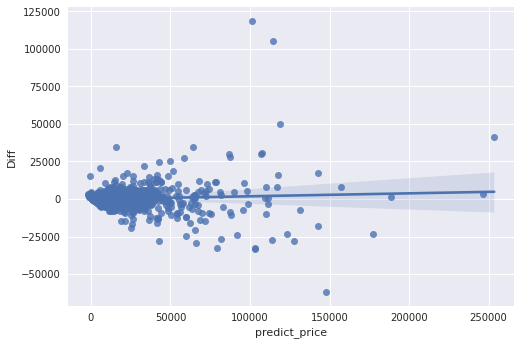

In [72]:
sns.regplot(out['predict_price'],out['Diff'])